### # [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model "sklearn.linear_model").Ridge[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn-linear-model-ridge "Permalink to this heading")
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)[source]


In [10]:
# 앞의 LinearRegression예제(Boston.csv)에서 분할한 feature 데이터 셋인 features과 Target 데이터 셋인 label 데이터셋을 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
#릿지,라쏘,크로스밸,리니얼어그레션

# boston 데이터셋 로드 
boston_df = pd.read_csv("../Boston dataset/Boston.csv",index_col=0)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
features = boston_df.drop(columns='medv', axis=1, inplace=False)#X_data
label = boston_df['medv'] #boston.target #y_target

In [15]:
features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [13]:
label

1      24.0
2      21.6
3      34.7
4      33.4
5      36.2
       ... 
502    22.4
503    20.6
504    23.9
505    22.0
506    11.9
Name: medv, Length: 506, dtype: float64

In [27]:
# 릿지 클래스를 ridge에 넣고
from sklearn.metrics import get_scorer_names

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, features, label, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.825 -27.279 -34.68  -52.694 -22.051]
 5 folds 의 개별 RMSE scores:  [3.581 5.223 5.889 7.259 4.696]
 5 folds 의 평균 RMSE : 5.329590 


In [28]:
# Ridge에 사용될 alpha 파라미터값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alpahs list 값을 iteration하면서 alpha에 따른 rmse 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, features, label, scoring="neg_mean_squared_error", cv=5)
    avg_scores = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때 5 folds의 평균 RMSE : {avg_scores:.3f}')

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
neg_mse_lasso_score = cross_val_score(lasso, features, label, scoring="neg_mean_squared_error", cv=5)
avg_rmse_lasso = np.mean(np.sqrt(-1 * neg_mse_lasso_score))
avg_rmse_lasso

6.585731788106534

In [31]:
from sklearn.linear_model import LinearRegression
li_reg = LinearRegression()
neg_mse_li_reg_score = cross_val_score(li_reg, features, label, scoring="neg_mean_squared_error", cv=5)

avg_rmse_li_reg = np.mean(np.sqrt(-1 * neg_mse_li_reg_score))
avg_rmse_li_reg

5.82865894621581

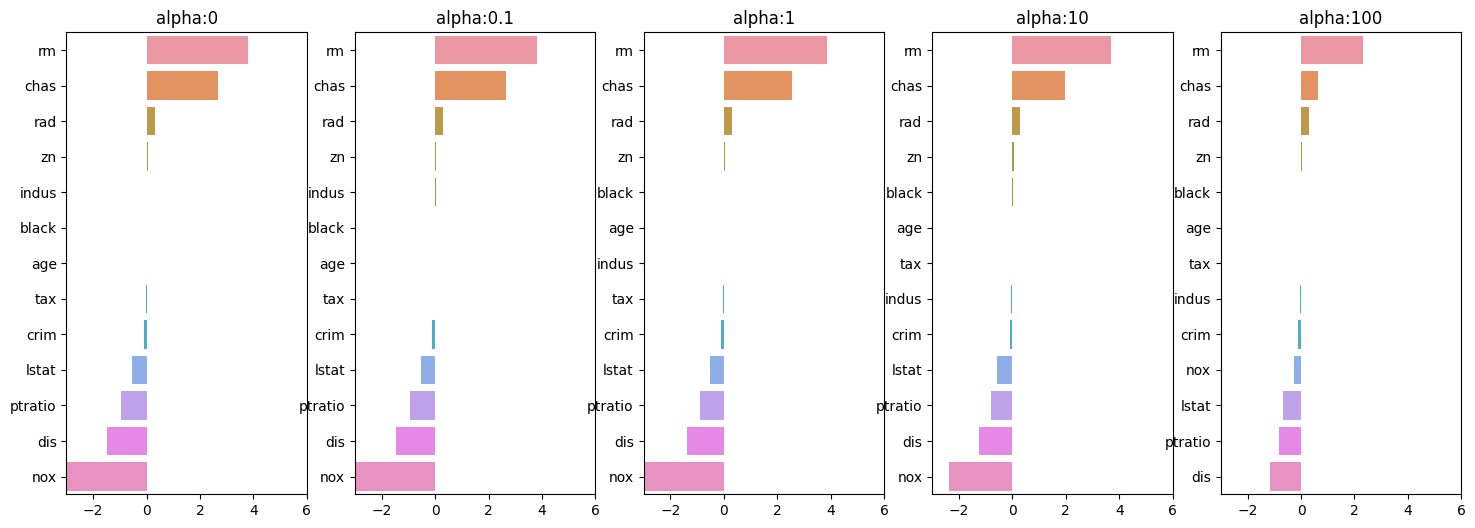

In [33]:
# alpha 값이 증가할수록 실제 회귀계수값이 감소하는지 확인

import matplotlib.pyplot as plt
import seaborn as sns

# 각 alpha에 따른 회귀계수를 5개 열의 맷플롯립으로 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀계수값을 데이터로 저장하기 위한 DataFrame생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀계수값 시각화 및 저장. pos는 axis위치 지정
# https://www.daleseo.com/python-enumerate/ ->enumerate()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(features,label)
    # alpha에 따른 피처별 회귀계수를 시리즈로 변환 후 DataFrame컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=features.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    # 막대그래프로 각 alpha값에서의 회귀계수 시각화. 회귀계수값이 높은 순
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index, ax= axs[pos])
    
plt.show()

In [34]:
# 릿지회귀에서 alpha값이 증가할수록 NOX값 감소 => 다른 회귀계수값들과 스케일이 비슷해짐 =>회귀모델 성능개선됨.
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column= 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.809865,3.818233,3.854000,3.702272,2.334536
chas,2.686734,2.670019,2.552393,1.952021,0.638335
rad,0.306049,0.303515,0.290142,0.279596,0.315358
zn,0.046420,0.046572,0.047443,0.049579,0.054496
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
black,0.009312,0.009368,0.009673,0.010037,0.009393
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


/var/folders/y5/d6ndznv10fldz_4mgz4psc5h0000gn/T/ipykernel_38596/3450279264.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(features,label)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.l

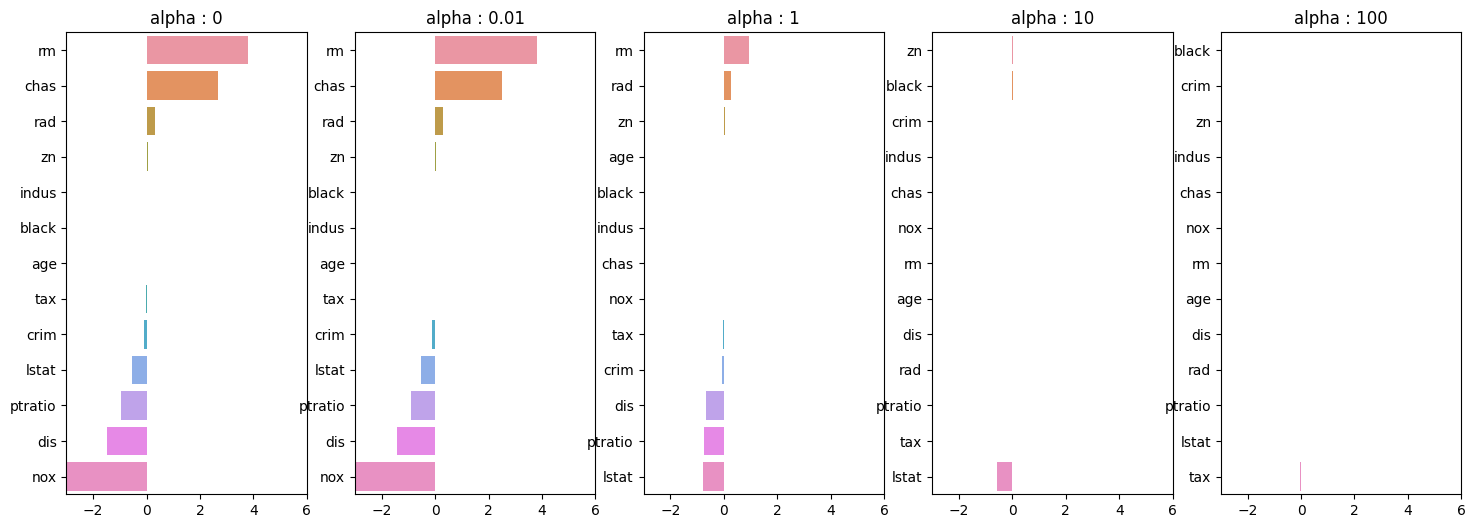

In [39]:
fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()


for pos, alpha in enumerate([0, 0.01, 1, 10, 100]):
    lasso = Lasso(alpha=alpha)
    lasso.fit(features,label)
    coeff = pd.Series(data=lasso.coef_, index= features.columns)
    colname = "alpha : " + str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
plt.show()

### ElasticNet
### [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model "sklearn.linear_model").ElasticNet[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn-linear-model-elasticnet "Permalink to this heading")
* _class_ sklearn.linear_model.ElasticNet(_alpha=1.0_,  _*_,  _l1_ratio=0.5_,  _fit_intercept=True_,  _precompute=False_,  _max_iter=1000_,  _copy_X=True_,  _tol=0.0001_,  _warm_start=False_,  _positive=False_,  _random_state=None_,  _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_coordinate_descent.py#L663)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet "Permalink to this definition")

Minimizes the objective function:

1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

a * ||w||_1 + 0.5 * b * ||w||_2^2

where:

alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

*
Parameters:

**alpha**float, default=1.0

Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter.  `alpha  =  0`  is equivalent to an ordinary least square, solved by the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object. For numerical reasons, using  `alpha  =  0`  with the  `Lasso`  object is not advised. Given this, you should use the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object.

**l1_ratio**float, default=0.5

The ElasticNet mixing parameter, with  `0  <=  l1_ratio  <=  1`. For  `l1_ratio  =  0`  the penalty is an L2 penalty.  `For  l1_ratio  =  1`  it is an L1 penalty. For  `0  <  l1_ratio  <  1`, the penalty is a combination of L1 and L2.

**fit_intercept**bool, default=True

Whether the intercept should be estimated or not. If  `False`, the data is assumed to be already centered.

**precompute**bool or array-like of shape (n_features, n_features), default=False

Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always  `False`  to preserve sparsity.

**max_iter**int, default=1000

The maximum number of iterations.

**copy_X**bool, default=True

If  `True`, X will be copied; else, it may be overwritten.

**tol**float, default=1e-4

The tolerance for the optimization: if the updates are smaller than  `tol`, the optimization code checks the dual gap for optimality and continues until it is smaller than  `tol`, see Notes below.

**warm_start**bool, default=False

When set to  `True`, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See  [the Glossary](https://scikit-learn.org/stable/glossary.html#term-warm_start).

**positive**bool, default=False

When set to  `True`, forces the coefficients to be positive.

**random_state**int, RandomState instance, default=None

The seed of the pseudo random number generator that selects a random feature to update. Used when  `selection`  == ‘random’. Pass an int for reproducible output across multiple function calls. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**selection**{‘cyclic’, ‘random’}, default=’cyclic’

If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

In [40]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, features_n=None, label_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,features_n, 
                                             label_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(features , label)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=features.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [42]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0 , 0.1 , 1 , 10 , 100]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, features_n=features, label_n=label)

#######  Lasso #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 5.829 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 6.586 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 8.393 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficien

In [ ]:
# *응용
# 상관관계가 강한 것 몇개 선택하여 linear regression 돌려보기.
# lasso에서 0이 아닌 것만 골라서 randomforest regressor or SCV에 돌려보기.